In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
import sys
sys.path.append('../')
from CEmulator.Emulator import Pkmm_CEmulator

##### import the emulator for the original cosmology [only one single massive neutrino]
csstemu = Pkmm_CEmulator(verbose=True, neutrino_mass_split='single')
klists  = np.logspace(-2, 1, 500)
zlists  = np.array([0.0, 1.0, 2.0, 3.0])

Loading the PkcbLin emulator...
Using 513 training samples.
Loading the PknnLin emulator...
Using 512 training samples [remove c0001 (no massive neutrino)].
The neutrino mass is treated as a single massive component.
Loading the Bk_lin emulator...
Using 129 training samples.
Loading the Bk_halofit emulator...
Using 129 training samples.
Loading the lgBk_lin2hmcode2020 emulator...
Using 513 training samples.
Loading the Bk_hmcode2020 emulator...
Using 129 training samples.


## $P(k)$ compare with HMCode

In [3]:
%%time
csstemu.set_cosmos(Omegac=0.25, As=2e-9, mnu=0.15)
pkcbce = csstemu.get_pknl(z=zlists, k=klists, 
                          Pcb=True, lintype='Emulator', 
                          nltype='hmcode2020')
print(pkcbce.shape)
pkmmce = csstemu.get_pknl(z=zlists, k=klists, 
                           Pcb=False, lintype='Emulator', 
                           nltype='hmcode2020')
print(pkmmce.shape)

(4, 500)
(4, 500)
CPU times: user 24.9 ms, sys: 87 µs, total: 25 ms
Wall time: 24.5 ms


In [4]:
%%time
camb_results = csstemu.get_camb_results(z=zlists, kmax=10.0, non_linear='mead2020')
pkcbhm = camb_results.get_matter_power_interpolator(nonlinear=True, 
                                                    var1='delta_nonu', var2='delta_nonu',
                                                    hubble_units=True, k_hunit=True).P(z=zlists, kh=klists)
pkmmhm = camb_results.get_matter_power_interpolator(nonlinear=True, 
                                                    var1='delta_tot', var2='delta_tot',
                                                    hubble_units=True, k_hunit=True).P(z=zlists, kh=klists)     

CPU times: user 6.18 s, sys: 32.8 ms, total: 6.21 s
Wall time: 8.31 s


In [5]:
from matplotlib import style
style.library.keys()

dict_keys(['dark_background', 'grayscale', 'seaborn-pastel', 'seaborn-dark', 'classic', 'seaborn-white', 'seaborn-paper', 'seaborn-notebook', '_mpl-gallery-nogrid', 'seaborn-talk', 'bmh', 'seaborn-poster', '_mpl-gallery', 'seaborn-ticks', 'seaborn-muted', 'seaborn-whitegrid', 'seaborn-darkgrid', 'seaborn', 'fast', 'seaborn-colorblind', 'Solarize_Light2', '_classic_test_patch', 'tableau-colorblind10', 'seaborn-bright', 'seaborn-dark-palette', 'fivethirtyeight', 'seaborn-deep', 'ggplot', 'article', 'mypresentation', 'presentation'])

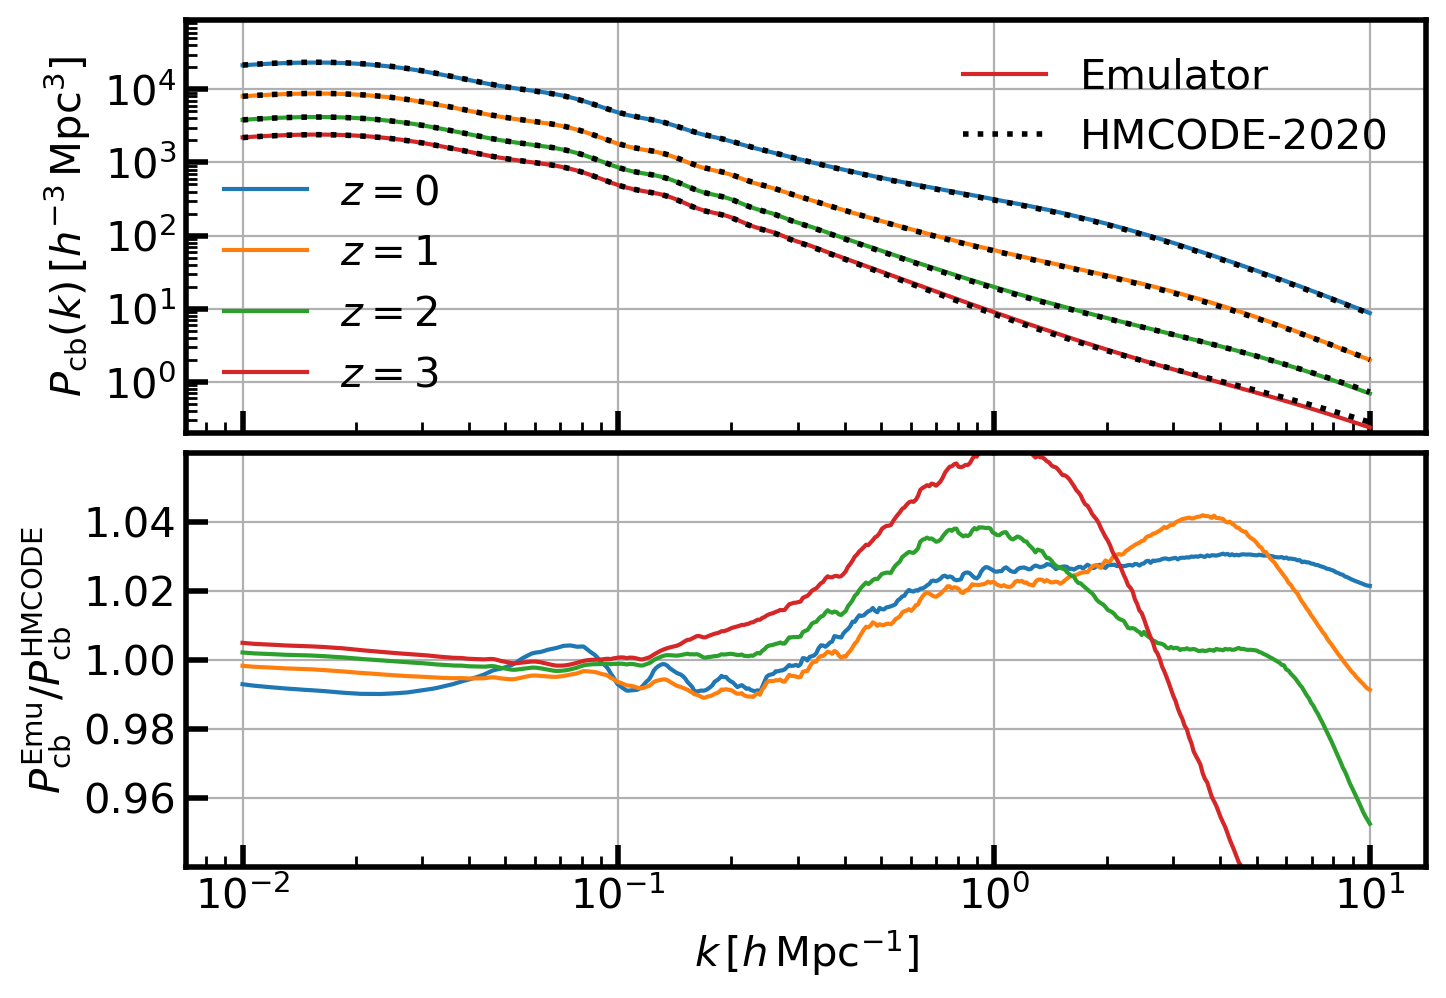

In [6]:
gridp = plt.GridSpec(2, 1, hspace=0.05)
with plt.style.context('article'):
    ax0 = plt.subplot(gridp[0,0])
    for iz in range(len(zlists)):
        l1, = plt.plot(klists, pkcbce[iz], label=r'$z=%.0f$'%(zlists[iz]))
        l2, = plt.plot(klists, pkcbhm[iz], 'k:', lw=2.0)
    leg1 = plt.legend([l1, l2], ['Emulator', 'HMCODE-2020'], loc=0, frameon=False)
    leg2 = plt.legend(loc=3, frameon=False)
    ax0.add_artist(leg1)
    plt.grid(True)
    plt.ylabel(r'$P_{\rm cb}(k)\, [h^{-3}\,{\rm Mpc}^3]$')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(2e-1, 9e4)
    ax0.set_xticklabels([])
    ax1 = plt.subplot(gridp[1,0])
    for iz in range(len(zlists)):
        l1, = plt.plot(klists, pkcbce[iz]/pkcbhm[iz], label=r'$z=%.0f$'%(zlists[iz]))
    plt.ylabel(r'$P_{\rm cb}^{\rm Emu}/P_{\rm cb}^{\rm HMCODE}$')
    plt.xlabel(r'$k\, [h\,{\rm Mpc}^{-1}]$')
    plt.xscale('log')
    plt.ylim(0.9401, 1.0599)
    plt.grid(True)

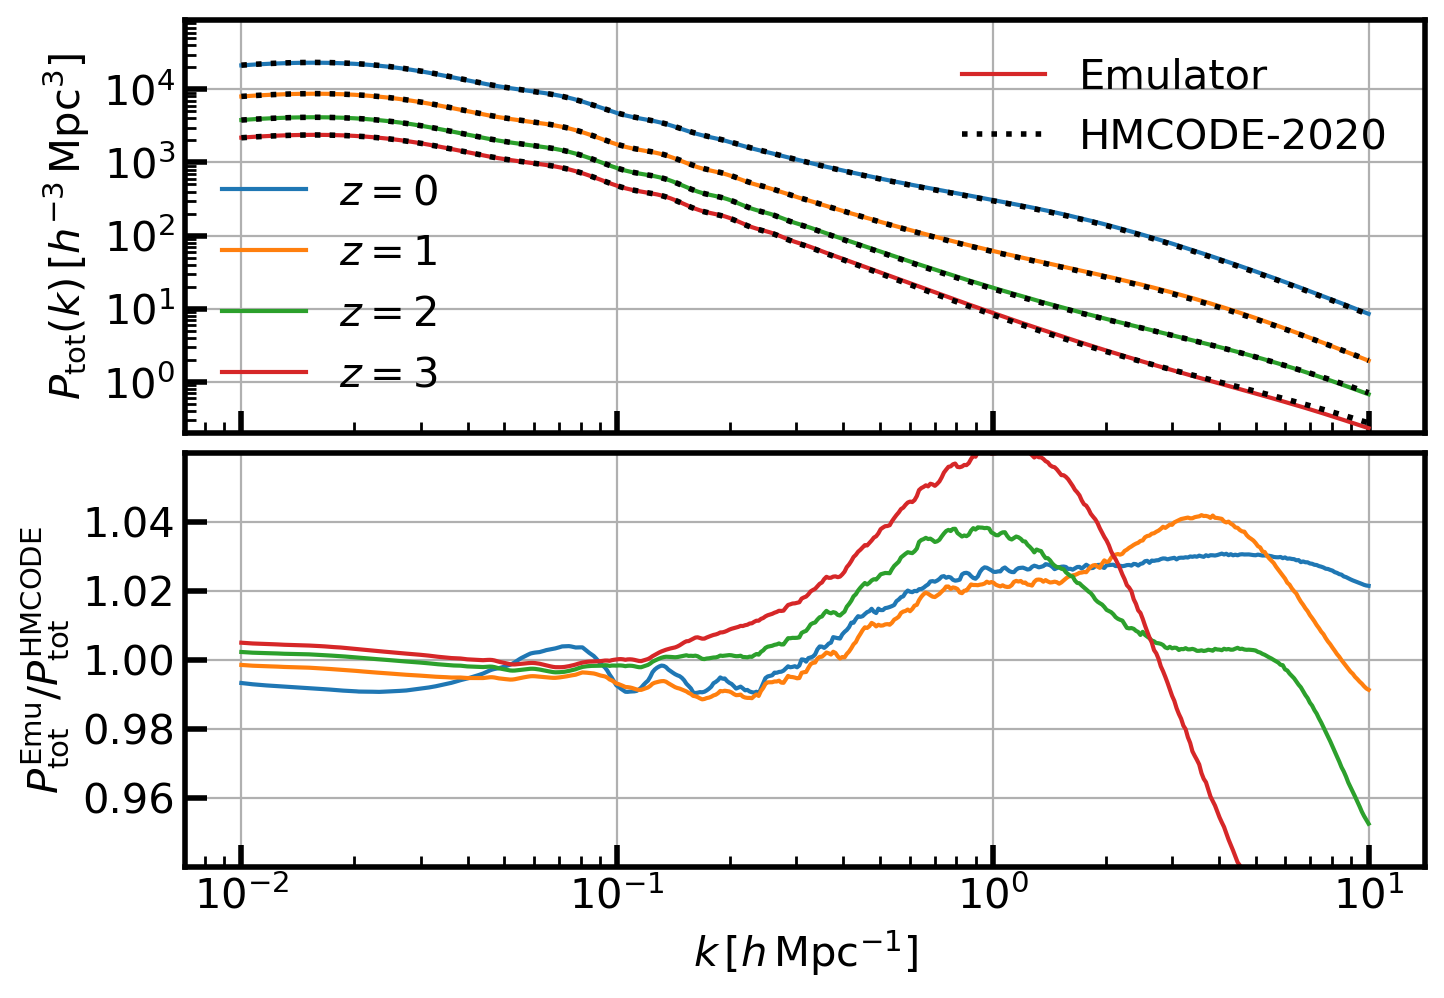

In [7]:
gridp = plt.GridSpec(2, 1, hspace=0.05)
with plt.style.context('article'):
    ax0 = plt.subplot(gridp[0,0])
    for iz in range(len(zlists)):
        l1, = plt.plot(klists, pkmmce[iz], label=r'$z=%.0f$'%(zlists[iz]))
        l2, = plt.plot(klists, pkmmhm[iz], 'k:', lw=2.0)
    leg1 = plt.legend([l1, l2], ['Emulator', 'HMCODE-2020'], loc=0, frameon=False)
    leg2 = plt.legend(loc=3, frameon=False)
    ax0.add_artist(leg1)
    plt.grid(True)
    plt.ylabel(r'$P_{\rm tot}(k)\, [h^{-3}\,{\rm Mpc}^3]$')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(2e-1, 9e4)
    ax0.set_xticklabels([])
    ax1 = plt.subplot(gridp[1,0])
    for iz in range(len(zlists)):
        l1, = plt.plot(klists, pkmmce[iz]/pkmmhm[iz], label=r'$z=%.0f$'%(zlists[iz]))
    plt.ylabel(r'$P_{\rm tot}^{\rm Emu}/P_{\rm tot}^{\rm HMCODE}$')
    plt.xlabel(r'$k\, [h\,{\rm Mpc}^{-1}]$')
    plt.xscale('log')
    plt.ylim(0.9401, 1.0599)
    plt.grid(True)

## Match $\sigma_8$ and Compare with HMCode

In [8]:
%%time
csstemu.set_cosmos(As=None, sigma8=0.73, sigma8type='CAMB')
As_camb = csstemu.Cosmo.As

The As is set to 1.714500e-09 (sigma8=0.730000) to match the input sigma8=0.730000.
CPU times: user 9.43 s, sys: 11.3 ms, total: 9.44 s
Wall time: 9.47 s


In [9]:
%%time
csstemu.set_cosmos(As=None, sigma8=0.73, sigma8type='CLASS')
As_class = csstemu.Cosmo.As

The As is set to 1.715853e-09 (sigma8=0.730000) to match the input sigma8=0.730000.
CPU times: user 5.73 s, sys: 2.18 ms, total: 5.73 s
Wall time: 5.74 s


In [10]:
%%time
csstemu.set_cosmos(As=None, sigma8=0.73, sigma8type='Emulator')
As_emu = csstemu.Cosmo.As

The As is set to 1.715875e-09 (sigma8=0.729921) to match the input sigma8=0.730000.
CPU times: user 14.7 ms, sys: 1.96 ms, total: 16.6 ms
Wall time: 16.2 ms


In [11]:
print('CAMB/CLASS:', As_camb/As_class)
print('Emu/CLASS :', As_emu/As_class)

CAMB/CLASS: 0.9992112444155028
Emu/CLASS : 1.0000131298458503


The agreement of $\sigma_8$ among Emulator CLASS and CAMB is less than 0.2% for cosmology in our emulation space.

In [12]:
pkcbce = csstemu.get_pknl(z=zlists, k=klists, 
                          Pcb=True, lintype='Emulator', 
                          nltype='halofit')
pkmmce = csstemu.get_pknl(z=zlists, k=klists, 
                           Pcb=False, lintype='Emulator', 
                           nltype='halofit')

cosmo_class = csstemu.get_cosmo_class(z=zlists, kmax=10.0, non_linear='HMCODE')
pkcbhm  = np.zeros((len(zlists), len(klists)))
pkmmhm = np.zeros((len(zlists), len(klists)))
h0 = csstemu.Cosmo.h0
for iz in range(len(zlists)):
    pkcbhm [iz] = np.array([cosmo_class.pk_cb(z=zlists[iz], k=ik*h0)*h0*h0*h0 for ik in klists])
    pkmmhm[iz] = np.array([cosmo_class.pk(z=zlists[iz], k=ik*h0)*h0*h0*h0 for ik in klists])


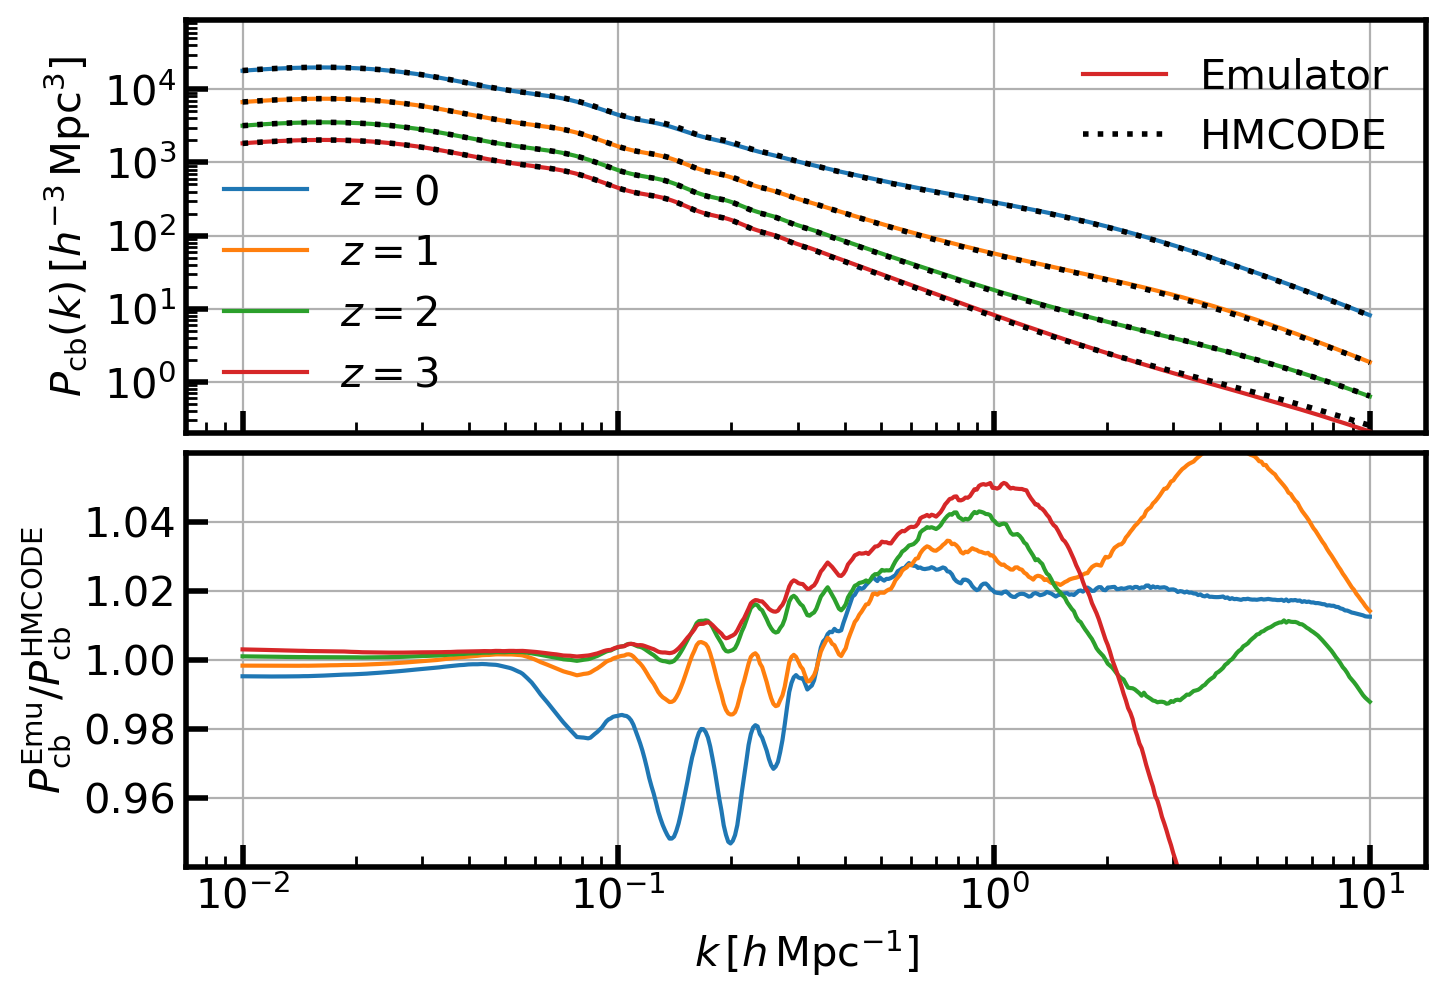

In [13]:
gridp = plt.GridSpec(2, 1, hspace=0.05)
with plt.style.context('article'):
    ax0 = plt.subplot(gridp[0,0])
    for iz in range(len(zlists)):
        l1, = plt.plot(klists, pkcbce[iz], label=r'$z=%.0f$'%(zlists[iz]))
        l2, = plt.plot(klists, pkcbhm[iz], 'k:', lw=2.0)
    leg1 = plt.legend([l1, l2], ['Emulator', 'HMCODE'], loc=0, frameon=False)
    leg2 = plt.legend(loc=3, frameon=False)
    ax0.add_artist(leg1)
    plt.grid(True)
    plt.ylabel(r'$P_{\rm cb}(k)\, [h^{-3}\,{\rm Mpc}^3]$')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(2e-1, 9e4)
    ax0.set_xticklabels([])
    ax1 = plt.subplot(gridp[1,0])
    for iz in range(len(zlists)):
        l1, = plt.plot(klists, pkcbce[iz]/pkcbhm[iz], label=r'$z=%.0f$'%(zlists[iz]))
    plt.ylabel(r'$P_{\rm cb}^{\rm Emu}/P_{\rm cb}^{\rm HMCODE}$')
    plt.xlabel(r'$k\, [h\,{\rm Mpc}^{-1}]$')
    plt.xscale('log')
    plt.ylim(0.9401, 1.0599)
    plt.grid(True)

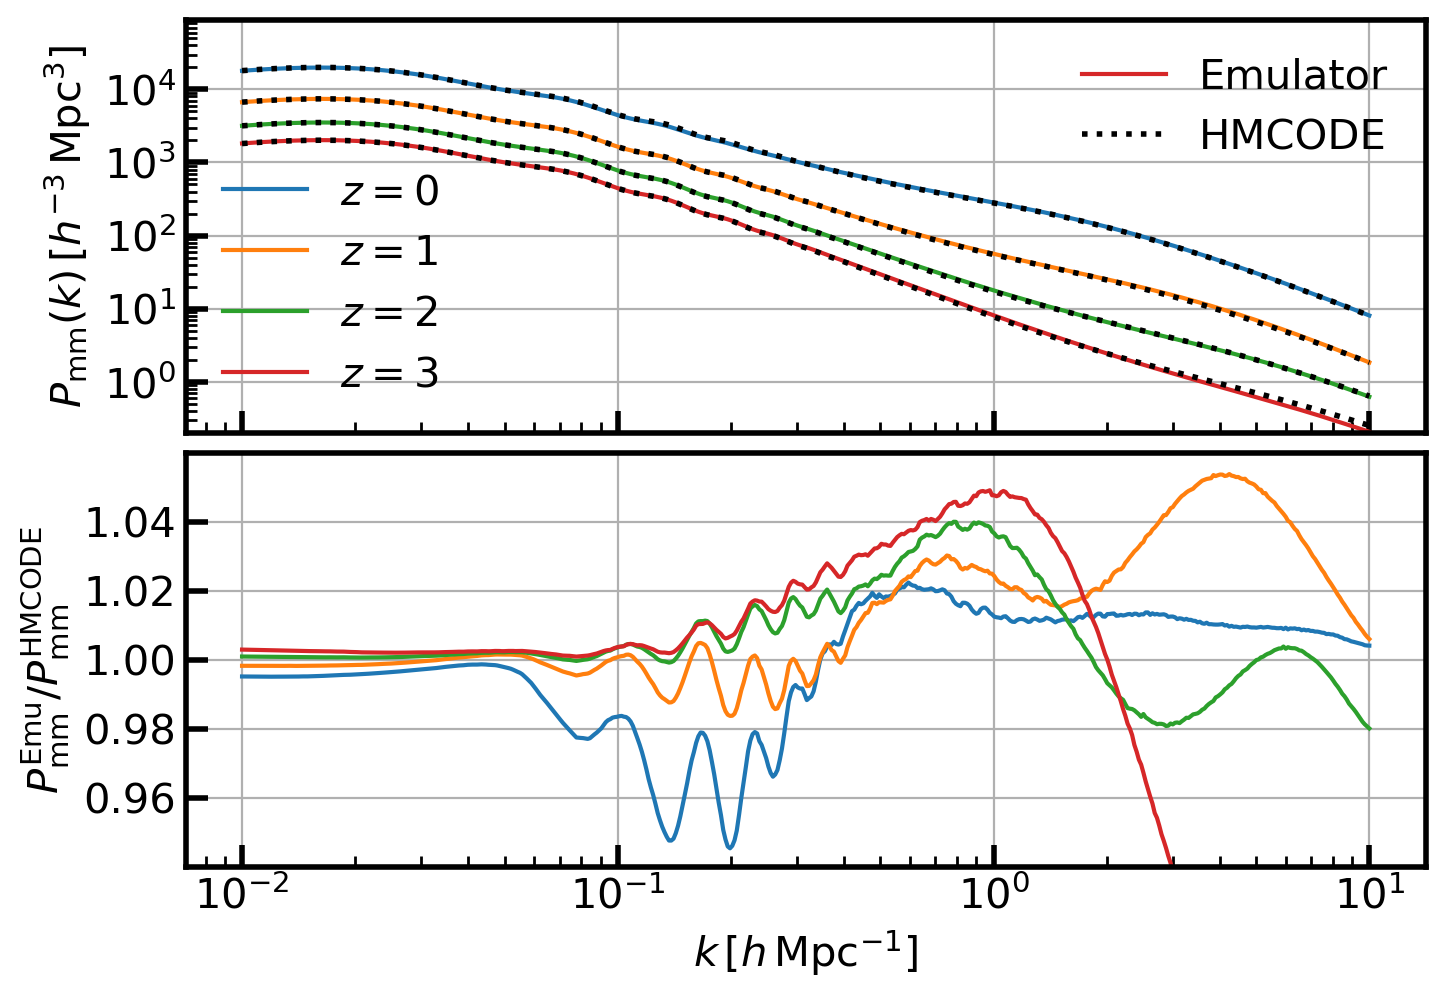

In [14]:
gridp = plt.GridSpec(2, 1, hspace=0.05)
with plt.style.context('article'):
    ax0 = plt.subplot(gridp[0,0])
    for iz in range(len(zlists)):
        l1, = plt.plot(klists, pkmmce[iz], label=r'$z=%.0f$'%(zlists[iz]))
        l2, = plt.plot(klists, pkmmhm[iz], 'k:', lw=2.0)
    leg1 = plt.legend([l1, l2], ['Emulator', 'HMCODE'], loc=0, frameon=False)
    leg2 = plt.legend(loc=3, frameon=False)
    ax0.add_artist(leg1)
    plt.grid(True)
    plt.ylabel(r'$P_{\rm mm}(k)\, [h^{-3}\,{\rm Mpc}^3]$')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(2e-1, 9e4)
    ax0.set_xticklabels([])
    ax1 = plt.subplot(gridp[1,0])
    for iz in range(len(zlists)):
        l1, = plt.plot(klists, pkmmce[iz]/pkmmhm[iz], label=r'$z=%.0f$'%(zlists[iz]))
    plt.ylabel(r'$P_{\rm mm}^{\rm Emu}/P_{\rm mm}^{\rm HMCODE}$')
    plt.xlabel(r'$k\, [h\,{\rm Mpc}^{-1}]$')
    plt.xscale('log')
    plt.ylim(0.9401, 1.0599)
    plt.grid(True)

In [15]:
csstemu.set_cosmos(As=None, sigma8=0.73, sigma8type='CAMB')

camb_results = csstemu.get_camb_results(z=zlists, kmax=10.0, non_linear='mead2020')
pkfunc = camb_results.get_matter_power_interpolator(nonlinear=True,
                                                    hubble_units=True, k_hunit=True,
                                                    var1='delta_nonu', var2='delta_nonu')
pkcbhm20 = pkfunc.P(zlists, klists)   
pkfunc = camb_results.get_matter_power_interpolator(nonlinear=True,
                                                    hubble_units=True, k_hunit=True,
                                                    var1='delta_tot', var2='delta_tot')
pkmmhm20 = pkfunc.P(zlists, klists)

The As is set to 1.714500e-09 (sigma8=0.730000) to match the input sigma8=0.730000.


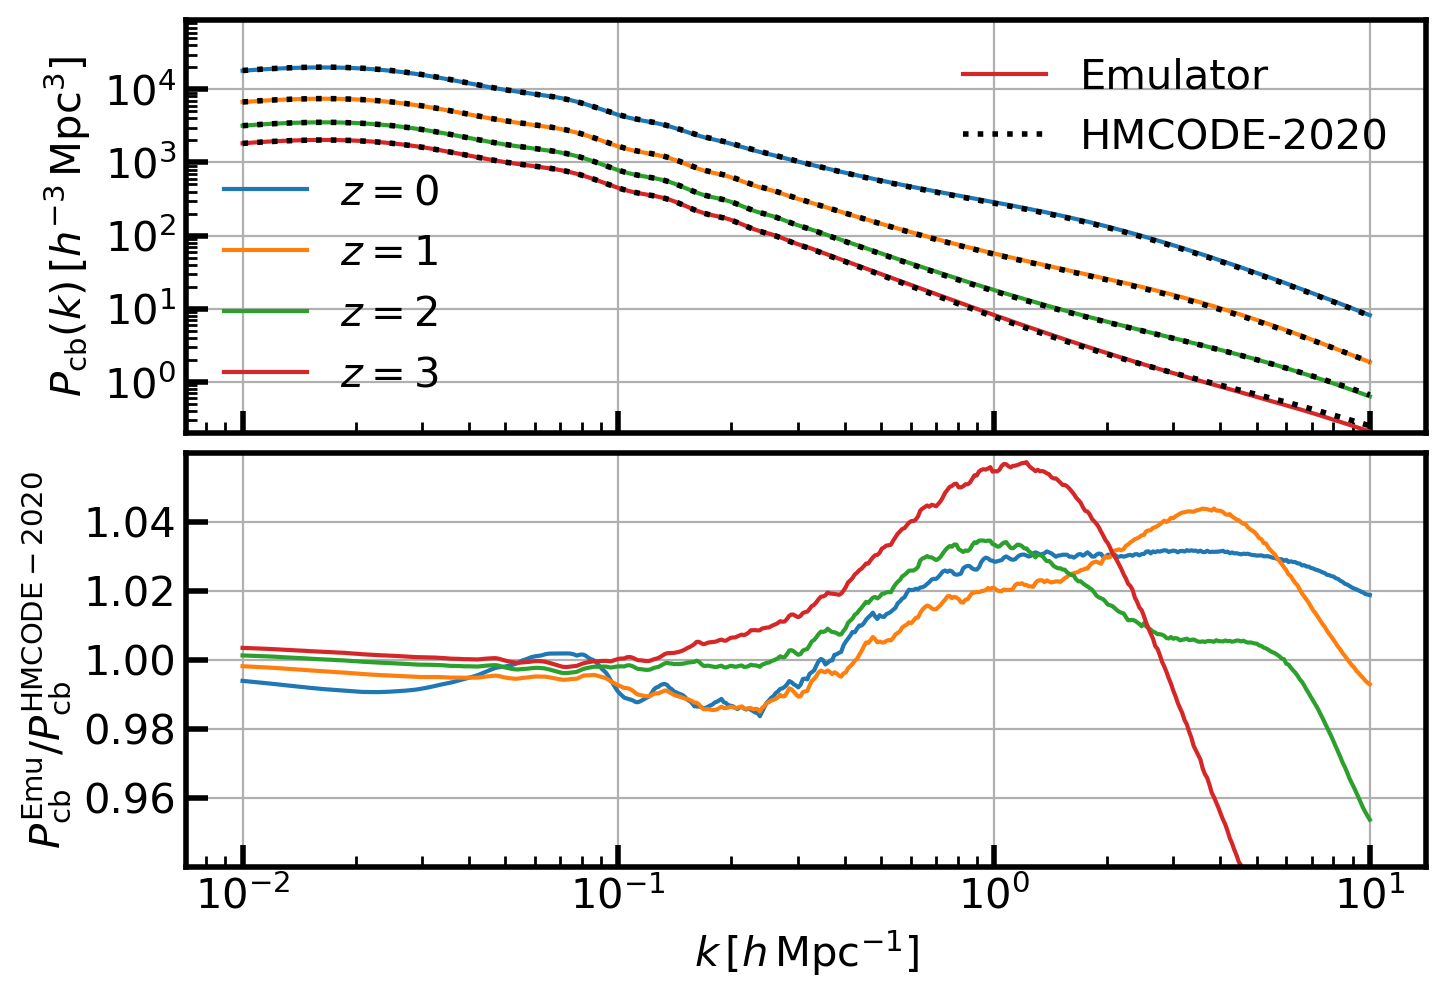

In [16]:
gridp = plt.GridSpec(2, 1, hspace=0.05)
with plt.style.context('article'):
    ax0 = plt.subplot(gridp[0,0])
    for iz in range(len(zlists)):
        l1, = plt.plot(klists, pkcbce[iz], label=r'$z=%.0f$'%(zlists[iz]))
        l2, = plt.plot(klists, pkcbhm20[iz], 'k:', lw=2.0)
    leg1 = plt.legend([l1, l2], ['Emulator', 'HMCODE-2020'], loc=0, frameon=False)
    leg2 = plt.legend(loc=3, frameon=False)
    ax0.add_artist(leg1)
    plt.grid(True)
    plt.ylabel(r'$P_{\rm cb}(k)\, [h^{-3}\,{\rm Mpc}^3]$')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(2e-1, 9e4)
    ax0.set_xticklabels([])
    ax1 = plt.subplot(gridp[1,0])
    for iz in range(len(zlists)):
        l1, = plt.plot(klists, pkcbce[iz]/pkcbhm20[iz], label=r'$z=%.0f$'%(zlists[iz]))
    plt.ylabel(r'$P_{\rm cb}^{\rm Emu}/P_{\rm cb}^{\rm HMCODE-2020}$')
    plt.xlabel(r'$k\, [h\,{\rm Mpc}^{-1}]$')
    plt.xscale('log')
    plt.ylim(0.9401, 1.0599)
    plt.grid(True)

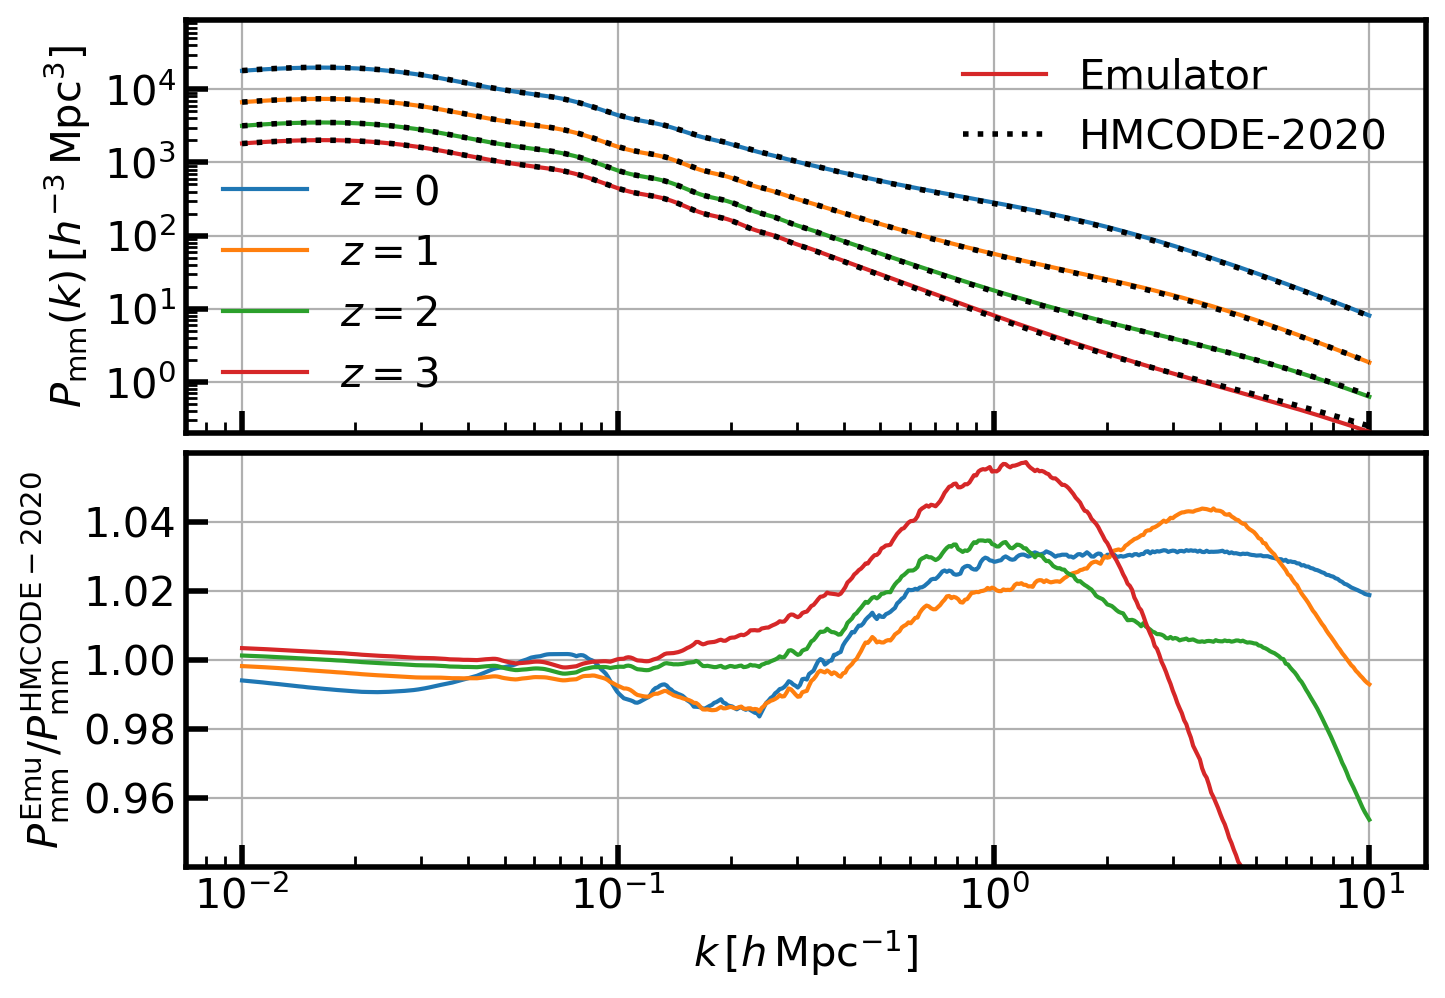

In [17]:
gridp = plt.GridSpec(2, 1, hspace=0.05)
with plt.style.context('article'):
    ax0 = plt.subplot(gridp[0,0])
    for iz in range(len(zlists)):
        l1, = plt.plot(klists, pkmmce[iz], label=r'$z=%.0f$'%(zlists[iz]))
        l2, = plt.plot(klists, pkmmhm20[iz], 'k:', lw=2.0)
    leg1 = plt.legend([l1, l2], ['Emulator', 'HMCODE-2020'], loc=0, frameon=False)
    leg2 = plt.legend(loc=3, frameon=False)
    ax0.add_artist(leg1)
    plt.grid(True)
    plt.ylabel(r'$P_{\rm mm}(k)\, [h^{-3}\,{\rm Mpc}^3]$')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(2e-1, 9e4)
    ax0.set_xticklabels([])
    ax1 = plt.subplot(gridp[1,0])
    for iz in range(len(zlists)):
        l1, = plt.plot(klists, pkmmce[iz]/pkmmhm20[iz], label=r'$z=%.0f$'%(zlists[iz]))
    plt.ylabel(r'$P_{\rm mm}^{\rm Emu}/P_{\rm mm}^{\rm HMCODE-2020}$')
    plt.xlabel(r'$k\, [h\,{\rm Mpc}^{-1}]$')
    plt.xscale('log')
    plt.ylim(0.9401, 1.0599)
    plt.grid(True)